# Random Forest

## Exercises
Create a new notebook, random_forests, and work with titanic data to do the following:


## Highlights

############# Markdown parser in Jupyter notebooks ##################

<div class="alert alert-block alert-info"> <b>NOTE</b>
 Use blue boxes for Tips and notes.
</div>

<div class="alert alert-block alert-success"> 
 Use green boxes sparingly, and only for some specific purpose that the other boxes can't cover. For example, if you have a lot of related content to link to, maybe   you decide to use green boxes for related links from each section of a notebook. 
</div>

<div class="alert alert-block alert-warning"> 
 Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. 
</div>

<div class="alert alert-block alert-danger">
 In general, just avoid the red boxes. 
</div>

## Imports

In [72]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

#import this for the Random Forest!
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

<div class="alert alert-block alert-success">
Load your DATA, PREPARE, and SPLIT.
</div>

In [2]:
titanic_df = acquire.get_titanic_data()

csv file found and loaded


In [3]:
titanic_df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [4]:
# Clean the new dataset using the new function called prep_titanic
titanic_df = prepare.prep_titanic(titanic_df)

In [5]:
# Split my data
train, validate, test = prepare.split_function(titanic_df, 'survived')

In [6]:
# Check your train data
train.head(2)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0


<div class="alert alert-block alert-success">
You can remove 'Sex' and 'Embarked' as they have been encoded to 'sex_male' and 'embarked_Q and _S'. Also you want to drop 'survived' and passenger_id becuase 
</div>

In [7]:
#Dropped all the columns that contained a type 'object'
train = train.select_dtypes(exclude=['object'])
train.head(2)

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0


In [8]:
#Dropped all the columns that contained a type 'object'
validate = validate.select_dtypes(exclude=['object'])
validate.head(2)

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
176,176,0,3,3,1,25.4667,0,1,0,1
372,372,0,3,0,0,8.0500,1,1,0,1


In [9]:
#Dropped all the columns that contained a type 'object'
test = test.select_dtypes(exclude=['object'])
test.head(2)

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
561,561,0,3,0,0,7.8958,1,1,0,1
641,641,1,1,0,0,69.3000,1,0,0,0


<div class="alert alert-block alert-success">
Stablish your baseline and baseline accuracy
</div>

In [10]:
#set baseline
titanic_df['baseline']= titanic_df.survived.value_counts().idxmax()
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline
0,0,0,3,male,1,0,7.2500,S,0,1,0,1,0
1,1,1,1,female,1,0,71.2833,C,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1,0
3,3,1,1,female,1,0,53.1000,S,0,0,0,1,0
4,4,0,3,male,0,0,8.0500,S,1,1,0,1,0


In [11]:
# calculate baseline accuracy
# baseline_accuracy = (train.servived == 0)
baseline_accuracy = 329 / (329+205)
print(f'Baseline accuracy: {baseline_accuracy}')

Baseline accuracy: 0.6161048689138576


<div class="alert alert-block alert-success">
Lets drop 'passenger_id' because it doesn't add any value to the data. Also, we need to remove the 'survived' column because is our TARGET.
</div>

<div class="alert alert-block alert-warning"> 
# Also, lets convert train to X_train.
</div>

In [12]:
# Lets drop 'passenger_id' because it doesn't add any value to the data. Also, we need to remove the 'survived' column because is our TARGET.
# Also, lets convert train to X_train. 
X_train = train.drop(columns = ['passenger_id', 'survived'])
X_train.head(2)

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0


In [13]:
# 'X' variables are DataFrames
# X will be our features
# Now we still need to drop the passenger_id and survived columns for validate.
X_validate = validate.drop(columns = ['passenger_id', 'survived'])
X_validate.head(2)

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
176,3,3,1,25.4667,0,1,0,1
372,3,0,0,8.0500,1,1,0,1


In [14]:
# 'X' variables are DataFrames
# X will be our features
# Now we still need to drop the passenger_id and survived columns for test.
X_test = test.drop(columns = ['passenger_id', 'survived'])
X_test.head(2)

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
561,3,0,0,7.8958,1,1,0,1
641,1,0,0,69.3000,1,0,0,0


<div class="alert alert-block alert-info"> <b>NOTE</b>
Lets find the 'y' for train, validate and test.
 </div>

In [15]:
# Set a target
target = 'survived'

In [16]:
# 'y' variable are series
y_train = train[target]
print(f'y_train {y_train}')
y_validate = validate[target]
y_test = test[target]

y_train 455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64


### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

<div class="alert alert-block alert-info"> <b>NOTE</b>

New import!
    
from sklearn.ensemble import RandomForestClassifier
</div>

#### a. Making the object
<div class="alert alert-block alert-info"> <b>NOTE</b>
 </div>

In [31]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

#### b. Fit the object
<div class="alert alert-block alert-info"> <b>NOTE</b></div>

In [32]:
# building our model on our train values
rf.fit(X_train, y_train)

RandomForestClassifier()

#### c. Transform the object
<div class="alert alert-block alert-info"> <b>NOTE</b>

    Predict
</div>

In [109]:
# Predict
rf.predict(X_train)[:5]
print(f'The train predict: {rf.predict(X_train)[:5]}')

The train predict: [0 1 1 1 0]


In [113]:
# The y_predict for train
y_pred_ = rf.predict(X_train)
y_pred[:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

<div class="alert alert-block alert-warning"> 
Set max depth and random_state
</div>

<div class="alert alert-block alert-info"> <b>NOTE</b>

    Making the object with the HYPERPARAMETER
</div>

In [103]:
#set max depth & random_state
trees = RandomForestClassifier(random_state=123, min_samples_leaf = 1, max_depth=10)
trees

RandomForestClassifier(max_depth=10, random_state=123)

<div class="alert alert-block alert-info"> <b>NOTE</b>

    FIT the object with the HYPERPARAMETER
</div>

In [104]:
# STILL USING TRAIN DATA
trees.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

<div class="alert alert-block alert-info"> <b>NOTE</b>

    TRANSFORM the object with the HYPERPARAMETER
</div>

In [105]:
# Evaluate on train
trees.score(X_train, y_train)

0.9438202247191011

In [106]:
# See predictions
trees.predict(X_train)[:5]

array([0, 1, 0, 1, 0])

In [107]:
#see probability of predictions 
trees.predict_proba(X_train)[:5]

array([[0.78443278, 0.21556722],
       [0.        , 1.        ],
       [0.51228134, 0.48771866],
       [0.25983925, 0.74016075],
       [0.99005903, 0.00994097]])

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [111]:
print('Accuracy of random forest classifier on training set: {:.9f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.945692884


In [114]:
# CONFUSION MATRIX
conf = confusion_matrix(y_train, y_pred)
conf

array([[324,   5],
       [ 25, 180]])

<div class="alert alert-block alert-info"> <b>PRO TIP: </b>
Let's make it look nice!
</div>

In [115]:
# Label the columns with a 0 and 1
labels = sorted(y_train.unique())
labels

[0, 1]

In [116]:
# Convert the confusion matrix into a DataFrame
pd.DataFrame(conf)

,0,1
0,324,5
1,25,180


In [117]:
# Print the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534



### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

<div class="alert alert-block alert-info"> <b>COOL: </b>
Trying to create a forest tree
</div>

In [115]:
# Label the columns with a 0 and 1
labels = sorted(y_train.unique())
labels

[0, 1]

In [33]:
# Let's continue to clean our table
pd.DataFrame(conf, 
             index = [str(label) + '_actual' for label in labels], # Added an index and gave it a the name of 'actual'
             columns = [str(label) + '_predict' for label in labels]) # Added a columns name of 'predict'

,0_predict,1_predict
0_actual,327,2
1_actual,27,178


> Note: Survived is our positive case

In [118]:
# Let's look at the conf again
conf

array([[324,   5],
       [ 25, 180]])

In [119]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(324, 5, 25, 180)

In [120]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy}\n")

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")

support_pos = TP + FN
support_neg = FP + TN
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.9438202247191011

True Positive Rate/Sensitivity/Recall/Power: 0.8780487804878049
False Positive Rate/False Alarm Ratio/Fall-out: 0.015197568389057751
True Negative Rate/Specificity/Selectivity: 0.9848024316109423
False Negative Rate/Miss Rate: 0.12195121951219512

Precision/PPV: 0.972972972972973
F1 Score: 0.923076923076923

Support (0): 205
Support (1): 329


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [99]:
#set max depth & random_state
trees = RandomForestClassifier(random_state=123, min_samples_leaf = 4, max_depth=6)
trees

RandomForestClassifier(max_depth=6, min_samples_leaf=4, random_state=123)

In [94]:
# STILL USING TRAIN DATA
trees.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=4, random_state=123)

In [95]:
# Evaluate on train
trees.score(X_train, y_train)

0.8520599250936329

In [137]:
# Run everything in one simple code. 
scores_all = []

for x in range(1,11):
    # make the object
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x)
    
    # fit the object
    rf.fit(X_train, y_train)
    
    # transform the object
    train_acc = rf.score(X_train, y_train)
    
    # evaluate on my validate data
    val_acc = rf.score(X_validate, y_validate)
    
    # store results in a DataFrame
    result = pd.DataFrame({'min_samples_leaf': [x], 'max_depth': [11-x], 'train_acc': [train_acc], 'val_acc': [val_acc]})
    
    # append to scores_all list
    scores_all.append(result)
    
    #print all
    print(f'min_samples_leaf = {x}, max_dept = {11-x}, accuracy = {train_acc, val_acc}')
    
# combine all results into a single DataFrame
scores_df = pd.concat(scores_all, ignore_index=True)

min_samples_leaf = 1, max_dept = 10, accuracy = (0.9438202247191011, 0.7584269662921348)
min_samples_leaf = 2, max_dept = 9, accuracy = (0.8913857677902621, 0.7865168539325843)
min_samples_leaf = 3, max_dept = 8, accuracy = (0.8707865168539326, 0.7865168539325843)
min_samples_leaf = 4, max_dept = 7, accuracy = (0.8576779026217228, 0.7921348314606742)
min_samples_leaf = 5, max_dept = 6, accuracy = (0.8445692883895131, 0.7921348314606742)
min_samples_leaf = 6, max_dept = 5, accuracy = (0.8370786516853933, 0.8089887640449438)
min_samples_leaf = 7, max_dept = 4, accuracy = (0.8239700374531835, 0.797752808988764)
min_samples_leaf = 8, max_dept = 3, accuracy = (0.8277153558052435, 0.7865168539325843)
min_samples_leaf = 9, max_dept = 2, accuracy = (0.7940074906367042, 0.7865168539325843)
min_samples_leaf = 10, max_dept = 1, accuracy = (0.7546816479400749, 0.7640449438202247)


In [138]:
scores_df

,min_samples_leaf,max_depth,train_acc,val_acc
0,1,10,0.943820,0.758427
1,2,9,0.891386,0.786517
2,3,8,0.870787,0.786517
3,4,7,0.857678,0.792135
4,5,6,0.844569,0.792135
5,6,5,0.837079,0.808989
6,7,4,0.823970,0.797753
7,8,3,0.827715,0.786517
8,9,2,0.794007,0.786517
9,10,1,0.754682,0.764045


### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

Changing the min and max didn't affect the precision of the outcome.

In [139]:
scores_df['difference'] = scores_df.train_acc - scores_df.val_acc

In [140]:
scores_df

,min_samples_leaf,max_depth,train_acc,val_acc,difference
0,1,10,0.943820,0.758427,0.185393
1,2,9,0.891386,0.786517,0.104869
2,3,8,0.870787,0.786517,0.084270
3,4,7,0.857678,0.792135,0.065543
4,5,6,0.844569,0.792135,0.052434
5,6,5,0.837079,0.808989,0.028090
6,7,4,0.823970,0.797753,0.026217
7,8,3,0.827715,0.786517,0.041199
8,9,2,0.794007,0.786517,0.007491
9,10,1,0.754682,0.764045,-0.009363


#### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

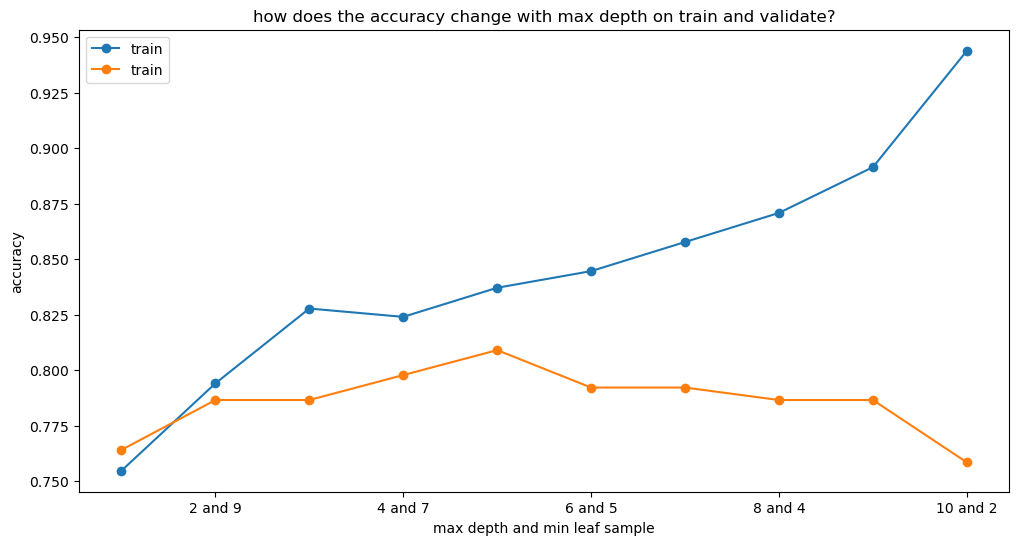

In [141]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='train', marker='o')
plt.xlabel('max depth and min leaf sample')
plt.ylabel('accuracy')

plt.xticks([2,4,6,8,10],
          [('2 and 9'),('4 and 7'),('6 and 5'),('8 and 4'),('10 and 2')]
          )

plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()